In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from sklearn.datasets import load_diabetes  # load thư viện
diabetes = load_diabetes()

X = diabetes.data  
y = diabetes.target 

In [3]:
from sklearn.datasets import load_boston # load data
boston_data = load_boston()

c:\Users\Dell\anaconda3\envs\daoanh\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [4]:
bos_df = pd.DataFrame(boston_data.data) # đưa dữ liệu vào DF
bos_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos_df.columns = boston_data.feature_names # Thêm feature name vào DF
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Bước 2: Tiền xử lí dữ liệu

## 2.1. Thêm, sửa, xóa

In [6]:
bos_df['PRICE']=boston_data.target # Thêm cột price vào DF
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
bos_df # hiển thị data sau khi clear

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 2.2. Tìm sự tương quan giữa Label ('PRICE') và các feature khác

<Axes: >

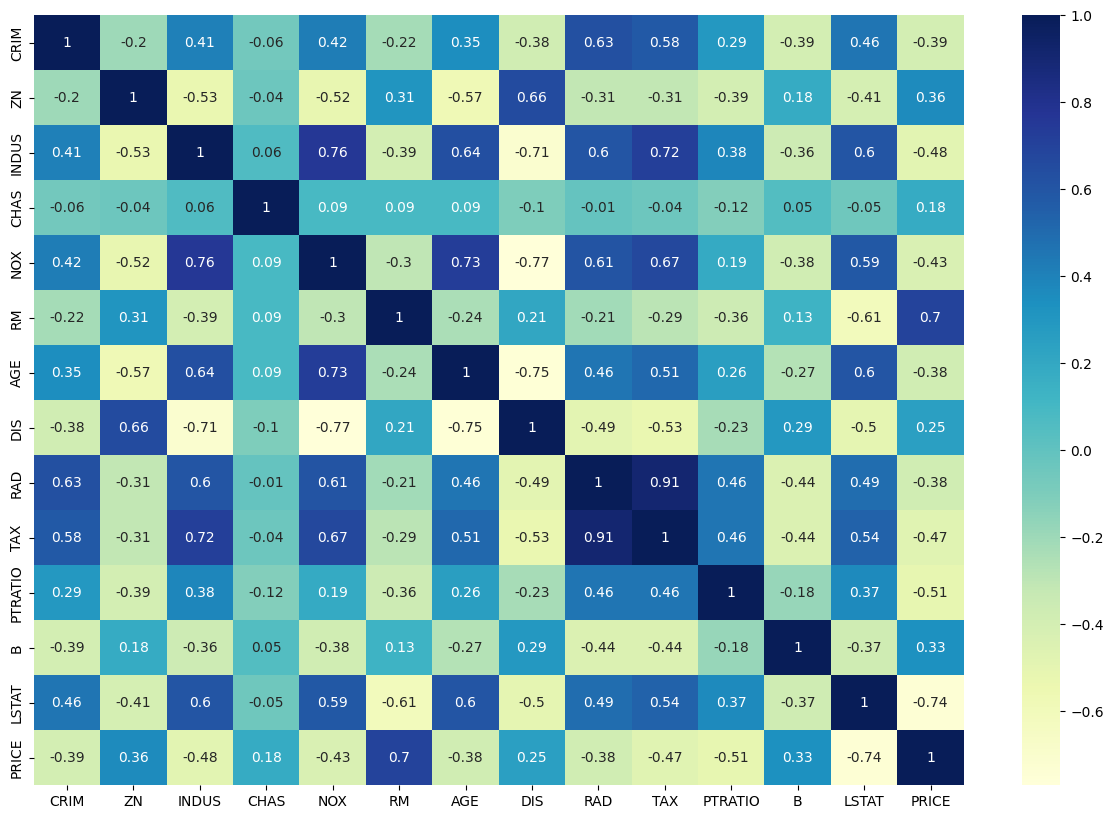

In [8]:
plt.figure(figsize=(15,10))
matrix = bos_df.corr().round(2) # Tính toán sự tương quan giữa feature trong df và làm tròn đến số thâp phân thứ 2
sns.heatmap(matrix, cmap='YlGnBu', annot=True) # cmap='YlGnBu': chỉ định màu sắc của heatmap. Nó sử dụng một màu sắc gradient từ màu vàng (Yl) đến màu xanh lam (GnBu).
# annot=True: Cho phép hiển thị giá trị tương quan giưuax các feature trong từng ô của heatmap.

Lấy dữ liệu của cột ZN và cột RM và cột label là PRICE

In [9]:
select_colume = ['ZN', 'RM']
x = bos_df[select_colume]
y = bos_df['PRICE']
print(x,y)

       ZN     RM
0    18.0  6.575
1     0.0  6.421
2     0.0  7.185
3     0.0  6.998
4     0.0  7.147
..    ...    ...
501   0.0  6.593
502   0.0  6.120
503   0.0  6.976
504   0.0  6.794
505   0.0  6.030

[506 rows x 2 columns] 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


## 2.3. Lấy các feature

### 2.3.1. Chia dữ liệu

## Truoc khi chia

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [11]:
minmax_scale = MinMaxScaler()   # Normalization
x_nor = minmax_scale.fit_transform(x)
y_price = np.array(y).reshape(-1,1)
y_nor = minmax_scale.fit_transform(y_price)

In [12]:
x_train_2, x_test_2, y_train_1, y_test_1 = train_test_split(x_nor, y_nor, test_size=0.2, random_state=5)

print(x_train_2.shape)
print(x_test_2.shape)
print(y_train_1.shape)
print(y_test_1.shape)


(404, 2)
(102, 2)
(404, 1)
(102, 1)


### 2.3.2. Normailization

# Bước 3: lựa chọn model

## 3.1. Chọn model Linear Regression

## 3.2. Train model 

In [13]:
re_2feature = LinearRegression() # Đào tạo model theo model LinearRegression
re_2feature.fit(x_train_2, y_train_1)

LinearRegression()

# Bước 4: Đánh giá model

In [14]:
y_train_perdict = re_2feature.predict(x_train_2) # Tính y_perdict theo X_train
y_train_perdict

array([[ 0.26846536],
       [ 0.80957291],
       [ 0.31391323],
       [ 0.34285074],
       [ 0.39326948],
       [ 0.13869038],
       [ 0.48472174],
       [ 0.13922297],
       [ 0.53471826],
       [ 0.31817397],
       [ 0.40516404],
       [ 0.64841513],
       [ 0.4378297 ],
       [ 0.34462605],
       [ 0.25124488],
       [ 0.32687298],
       [ 0.34262304],
       [ 0.28513596],
       [ 0.31586607],
       [ 0.62740661],
       [ 0.37658159],
       [ 0.32637743],
       [ 0.35540664],
       [ 0.46019857],
       [ 0.35865098],
       [ 0.31284805],
       [ 0.3252752 ],
       [ 0.78475875],
       [ 0.64145747],
       [ 0.38776603],
       [ 0.28923646],
       [ 0.3483542 ],
       [ 0.41830132],
       [ 0.34160803],
       [ 0.21982193],
       [ 0.0822356 ],
       [ 0.44323281],
       [ 0.52605939],
       [ 0.32563026],
       [ 0.34853173],
       [ 0.22497032],
       [ 0.29811299],
       [ 0.67806276],
       [ 0.29935571],
       [ 0.45295408],
       [ 0

In [15]:
y_test_perdict = re_2feature.predict(x_test_2) # Tính y_perdict theo X_test
y_test_perdict

array([[0.68370979],
       [0.56373296],
       [0.39557738],
       [0.12732841],
       [0.65433694],
       [0.19798565],
       [0.49481707],
       [0.45043438],
       [0.44848154],
       [0.39912799],
       [0.5729306 ],
       [0.31888409],
       [0.31657619],
       [0.59474095],
       [0.44964398],
       [0.30343892],
       [0.07797486],
       [0.21573872],
       [0.21325329],
       [0.27840708],
       [0.16052666],
       [0.38758849],
       [0.72383174],
       [0.3893638 ],
       [0.66133473],
       [0.29562756],
       [0.38829862],
       [0.35279247],
       [0.37764677],
       [0.52209351],
       [0.29598263],
       [0.21751403],
       [0.30148608],
       [0.5688474 ],
       [0.46481993],
       [0.37942208],
       [0.43356896],
       [0.30308386],
       [0.77985119],
       [0.62553373],
       [0.35581049],
       [0.14738938],
       [0.43126106],
       [0.31728632],
       [0.41901144],
       [0.59022518],
       [0.05862401],
       [0.314

In [16]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test_1, y_test_perdict)))
r2 = round(re_2feature.score(x_test_2, y_test_1), 2)

print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 0.11147638970582857
R2: 0.68


## chia truoc, Normal sau

In [17]:
x_train_2, x_test_2, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state=5)

print(x_train_2.shape)
print(x_test_2.shape)
print(y_train_1.shape)
print(y_test_1.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [18]:
minmax_scale = MinMaxScaler()   # Normalization
x_train_nor = minmax_scale.fit_transform(x_train_2)
x_test_nor = minmax_scale.fit_transform(x_test_2)
y_train_nor = np.array(y_train_1).reshape(-1,1)
y_train_norr = minmax_scale.fit_transform(y_train_nor)
y_test_nor = np.array(y_test_1).reshape(-1,1)
y_test_norr = minmax_scale.fit_transform(y_test_nor)

In [19]:
re_2feature1 = LinearRegression() # Đào tạo model theo model LinearRegression
re_2feature1.fit(x_train_nor, y_train_norr)

LinearRegression()

In [20]:
y_test_perdict1 = re_2feature1.predict(x_test_nor) # Tính y_perdict theo X_test
y_test_perdict1

array([[ 0.72957113],
       [ 0.53760424],
       [ 0.34190341],
       [-0.01901213],
       [ 0.68241541],
       [ 0.07605365],
       [ 0.47542544],
       [ 0.41571076],
       [ 0.41308331],
       [ 0.34668058],
       [ 0.58052328],
       [ 0.23871644],
       [ 0.23561128],
       [ 0.59726858],
       [ 0.4070113 ],
       [ 0.21793573],
       [-0.08541485],
       [ 0.09993952],
       [ 0.0965955 ],
       [ 0.18425665],
       [ 0.02565445],
       [ 0.33115477],
       [ 0.7835532 ],
       [ 0.33354335],
       [ 0.66510453],
       [ 0.20742595],
       [ 0.3321102 ],
       [ 0.28433846],
       [ 0.31777868],
       [ 0.48921646],
       [ 0.20790366],
       [ 0.10232811],
       [ 0.21530828],
       [ 0.57502953],
       [ 0.42208456],
       [ 0.32016727],
       [ 0.39301918],
       [ 0.21745801],
       [ 0.85128853],
       [ 0.62266308],
       [ 0.28839906],
       [ 0.00797891],
       [ 0.38991401],
       [ 0.23656671],
       [ 0.37343276],
       [ 0

In [21]:
rmse_1 = (np.sqrt(metrics.mean_squared_error(y_test_norr, y_test_perdict1)))
r2_1 = round(re_2feature.score(x_test_nor, y_test_norr), 2)

print(f'RMSE: {rmse_1}')
print(f'R2: {r2_1}')

RMSE: 0.11780078113337342
R2: 0.67


In [22]:
print(rmse, r2)         # Normal truoc, chia sau
print(rmse_1, r2_1)     # Chia truoc, normal sau

0.11147638970582857 0.68
0.11780078113337342 0.67


# Tính tất cả các cặp feature

In [23]:
select_colume = [['INDUS', 'NOX'], ['INDUS', 'NOX'], ['CRIM', 'AGE'],
                 ['INDUS'], ['NOX', 'RAD'], ['INDUS', 'PTRATIO'], 
                 ['LSTAT', 'NOX'], ['B', 'RAD'], ['INDUS', 'AGE', 'RAD'], 
                 ['ZN', 'PTRATIO']]

In [24]:
def all_result(select_colume):
    x = bos_df[select_colume]
    y = bos_df['PRICE']

    x_train_2, x_test_2, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state=5)
    
    minmax_scale = Normalizer().fit(x_train_2)   # Normalization
    x_train_nor = minmax_scale.transform(x_train_2)
    x_test_nor = minmax_scale.transform(x_test_2)


    re_2feature = LinearRegression()
    re_2feature.fit(x_train_nor, y_train_1)

    y_test_perdict = re_2feature.predict(x_test_nor)

    rmse = (np.sqrt(metrics.mean_squared_error(y_test_1, y_test_perdict)))
    r2 = round(re_2feature.score(x_test_nor, y_test_1), 2)

    return rmse, r2


In [25]:
def data_result(select_colume):
    list_score = []
    for i in select_colume:
        result = all_result(i)
        list_score.append(result)

    return list_score

data_result(select_colume)

[(8.046446247039217, 0.17),
 (8.046446247039217, 0.17),
 (8.046278943022417, 0.17),
 (8.86642863576618, -0.0),
 (8.580919738153588, 0.06),
 (7.799414792575641, 0.22),
 (5.346691626739805, 0.63),
 (8.274206464206468, 0.13),
 (8.175830829818011, 0.15),
 (8.512087819559452, 0.07)]

## Normal truoc, chia sau

In [26]:
def all_result1(select_colume):
    x = bos_df[select_colume]
    y = bos_df['PRICE']

    scale =  Normalizer().fit(x)
    x_nor = scale.transform(x)

    x_train_2, x_test_2, y_train_1, y_test_1 = train_test_split(x_nor, y, test_size=0.2, random_state=5)
    
    re_2feature = LinearRegression()
    re_2feature.fit(x_train_2, y_train_1)

    y_test_perdict = re_2feature.predict(x_test_2)

    rmse = (np.sqrt(metrics.mean_squared_error(y_test_1, y_test_perdict)))
    r2 = round(re_2feature.score(x_test_2, y_test_1), 2)

    return rmse, r2


In [27]:
def data_result1(select_colume):
    list_score = []
    for i in select_colume:
        result = all_result1(i)
        list_score.append(result)

    return list_score

data_result1(select_colume)

[(8.046446247039217, 0.17),
 (8.046446247039217, 0.17),
 (8.046278943022417, 0.17),
 (8.86642863576618, -0.0),
 (8.580919738153588, 0.06),
 (7.799414792575641, 0.22),
 (5.346691626739805, 0.63),
 (8.274206464206468, 0.13),
 (8.175830829818011, 0.15),
 (8.512087819559452, 0.07)]

In [28]:
print(data_result(select_colume))
print(data_result1(select_colume))


[(8.046446247039217, 0.17), (8.046446247039217, 0.17), (8.046278943022417, 0.17), (8.86642863576618, -0.0), (8.580919738153588, 0.06), (7.799414792575641, 0.22), (5.346691626739805, 0.63), (8.274206464206468, 0.13), (8.175830829818011, 0.15), (8.512087819559452, 0.07)]
[(8.046446247039217, 0.17), (8.046446247039217, 0.17), (8.046278943022417, 0.17), (8.86642863576618, -0.0), (8.580919738153588, 0.06), (7.799414792575641, 0.22), (5.346691626739805, 0.63), (8.274206464206468, 0.13), (8.175830829818011, 0.15), (8.512087819559452, 0.07)]
